<a href="https://colab.research.google.com/github/pikey-msc/Python/blob/main/M3/C4_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf Python
!git clone https://github.com/pikey-msc/Python.git

Cloning into 'Python'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 157 (delta 50), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (157/157), 6.45 MiB | 8.61 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas_datareader

In [ ]:
from pandas_datareader import wb
from datetime import datetime

#Análisis de datos financieros

#Importación con Datareader

## Indicadores

Muchas instituciones financieras, mercados de valores y bancos globales proporcionan al público grandes cantidades de datos que almacenan públicamente. La mayoría de estos datos están bien organizados, se actualizan en directo y son accesibles mediante el uso de una interfaz de programación de aplicaciones (API), que ofrece a los lenguajes de programación como Python una forma de descargarlos e importarlos.

El módulo pandas-datareader está específicamente diseñado para interactuar con algunas de las APIs de datos financieros más populares del mundo, e importar sus datos en un DataFrame de pandas fácilmente digerible. Se accede a cada API financiera mediante una función diferente expuesta por pandas-datareader. Generalmente, el acceso a cada API requiere un conjunto diferente de argumentos e información que debe proporcionar el programador.

Vamos a importar datos de varias de estas API y a jugar con ellos. Para una lista completa de todos los datos a los que puede acceder el pandas-datareader, puedes consultar la documentación oficial.

In [ ]:
start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
indicator_id = 'NY.GDP.PCAP.KD'

In [ ]:
gdp_per_capita = wb.download(indicator=indicator_id, start=start, end=end, country=['US', 'CA', 'MX'])

In [ ]:
gdp_per_capita

NY.GDP.PCAP.KD
country       year                
Canada        2020    42294.234573
              2019    45118.659098
              2018    44917.369814
              2017    44325.416776
              2016    43536.913403
              2015    43596.135537
Mexico        2020     8909.677654
              2019     9820.448553
              2018     9945.776845
              2017     9842.400712
              2016     9751.569083
              2015     9616.645558
United States 2020    58559.674513
              2019    60836.771454
              2018    59821.592274
              2017    58387.775808
              2016    57418.933846
              2015    56863.371496

El método download tiene diferentes parámetros que podemos pasar para obtener los datos del Banco Mundial. Entre ellos está el indicator_id.

## Símbolos

El mercado de valores NASDAQ identifica cada una de sus acciones con un símbolo único:

*   Apple - APPL
*   Google - GOOGL
*   Tesla - TSLA

También proporciona una útil API para acceder a los símbolos que se negocian actualmente en ella. Pandas-datareader proporciona varias funciones para importar datos de la API de NASDAQ a través de su submódulo nasdaq_trader.

In [ ]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols

Para importar la lista de símbolos bursátiles, queremos utilizar la función get_nasdaq_symbols de nasdaq_trader.


In [ ]:
symbols = get_nasdaq_symbols()

Cuando se llame, irá a la API de NASDAQ, e importará la lista de símbolos que se están negociando actualmente. La ventaja de usar pandas-datareader es que toda la lógica para interactuar con la API de NASDAQ o cualquier otra API está encapsulada en submódulos y funciones fáciles de usar como las anteriores.

In [ ]:
symbols

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAA,True,Listed Funds Trust AAF First Priority CLO Bond...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,Z,,True,100.0,False,NaN,AAAU,AAAU,False
AAC,True,Ares Acquisition Corporation Class A Ordinary ...,N,,False,100.0,False,NaN,AAC,AAC,False
...,...,...,...,...,...,...,...,...,...,...,...
ZXZZT,True,NASDAQ TEST STOCK,Q,G,False,100.0,True,N,NaN,ZXZZT,False
ZY,True,Zymergen Inc. - Common Stock,Q,Q,False,100.0,False,N,NaN,ZY,False
ZYME,True,Zymeworks Inc. Common Shares,N,,False,100.0,False,NaN,ZYME,ZYME,False


Tenemos un total de 12,033 acciones diferentes que cotizan en el Nasdaq, y en cuyas columnas tenemos diferente información económica y financiera sobre esa acción. Pero, ¿qué ocurre si queremos acceder a un solo símbolo/acción?

In [ ]:
symbols.loc['IBM']

Nasdaq Traded                                                    True
Security Name       International Business Machines Corporation Co...
Listing Exchange                                                    N
Market Category                                                      
ETF                                                             False
Round Lot Size                                                  100.0
Test Issue                                                      False
Financial Status                                                  NaN
CQS Symbol                                                        IBM
NASDAQ Symbol                                                     IBM
NextShares                                                      False
Name: IBM, dtype: object

## Importación con y finance

El análisis técnico en finanzas es el tipo de análisis que se realiza mediante estadísticas y gráficos sobre acciones (o índices en nuestro caso). Vamos a ver cómo hacer algo muy sencillo con 'Plotly' una librería de Python para hacer gráficos. En este caso accederemos a las cotizaciones diarias de Microsoft.

In [ ]:
import plotly.graph_objects as go

In [ ]:
!pip install yfinance
import yfinance as yf

start = '2020-01-01'

symbol = 'GOOGL'
stock_data = yf.Ticker(symbol)
stock_data = stock_data.history(start=start)#, end=end) 

In [ ]:
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,1348.410034,1368.680054,1346.489990,1368.680054,1363900,0,0
2020-01-03,1348.000000,1373.750000,1347.319946,1361.520020,1170400,0,0
2020-01-06,1351.630005,1398.319946,1351.000000,1397.810059,2338400,0,0
2020-01-07,1400.459961,1403.500000,1391.560059,1395.109985,1716500,0,0
2020-01-08,1394.819946,1411.849976,1392.630005,1405.040039,1765700,0,0
...,...,...,...,...,...,...,...
2022-02-25,2671.040039,2705.429932,2635.030029,2689.189941,1820300,0,0
2022-02-28,2661.000000,2715.030029,2651.850098,2701.139893,1939400,0,0
2022-03-01,2697.570068,2725.110107,2664.370117,2681.229980,1324800,0,0


Hemos accedido a los datos de GOOGL. Lo hemos hecho importando con Yahoo Finance para importar los datos desde una API. Ahora vamos a graficar el resultado para hacer un Análisis Técnico.

In [ ]:
graph = {
    'x': stock_data.index,
    'open': stock_data.Open,
    'close': stock_data.Close,
    'high': stock_data.High,
    'low': stock_data.Low,
    'type': 'candlestick',
    'name': 'GOOGL',
    'showlegend': True
}

layout = go.Figure(
    data = [graph],
    layout_title="GOOGLE Stock"
)

layout

Hoy es 03 de Marzo de 2022, por lo que el último dato del gráfico es esa fecha, tú puedes hacer lo mismo, colocar el mouse al final del gráfico y ver la última cotización de la acción. Podrías en este caso acceder a tu cartera de inversiones y ejecutar el código diariamente y hacer un análisis técnico sobre esas entradas.

## Filtrado de datos por fecha

In [ ]:
import pandas_datareader.data as web

start = '2020-01-01'
end = '2022-01-01'

sap_data = web.DataReader('SP500', 'fred', start, end)

sap_data

,SP500
DATE,
2020-01-01,NaN
2020-01-02,3257.85
2020-01-03,3234.85
2020-01-06,3246.28
2020-01-07,3237.18
...,...
2021-12-27,4791.19
2021-12-28,4786.35
2021-12-29,4793.06


La función DataReader toma 4 argumentos:

* SP500 - Un identificador proporcionado por la API que especifica los datos que queremos recuperar, en este caso datos del SP500
* "fred " - El nombre de la API a la que queremos acceder
* fecha_inicial, fecha_final - El rango de fechas que queremos que tengan los datos

Cambiando las fechas de inicio y fin, podemos filtrar fácilmente los datos que recibimos

#Análisis técnico

## Funciones

### Shift()

Una vez que hemos importado un DataFrame lleno de datos financieros, hay algunas formas muy interesantes de manipularlo. En este ejercicio veremos la operación shift(), una función de DataFrame que mueve todas las filas de una columna hacia arriba o hacia abajo

Desplaza todas las filas hacia abajo en 1
    
    dataframe.shift(1)

Desplaza todas las filas de la columna nombre hacia arriba 5
    
    dataframe[name].shift(-5)

Desplaza todas las filas de la columna del nombre hacia abajo 3
    
    dataframe[name].shift(3)

Shift es especialmente útil cuando se trata de datos financieros. Por ejemplo, se puede utilizar para ayudar a calcular el porcentaje de crecimiento entre una fila y la siguiente, o para encontrar la diferencia en los precios de las acciones durante una serie de días. Veamos un ejemplo

In [ ]:
start = '2020-01-01'

symbol = 'GOOGL'
stock_data = yf.Ticker(symbol)
stock_data = stock_data.history(start=start)

In [ ]:
Google = stock_data[["Open", "Close"]]

In [ ]:
Google["Close_1"]= Google["Close"].shift(1)
Google.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,Close,Close_1
Date,,,
2020-01-02,1348.410034,1368.680054,NaN
2020-01-03,1348.000000,1361.520020,1368.680054
2020-01-06,1351.630005,1397.810059,1361.520020
2020-01-07,1400.459961,1395.109985,1397.810059
2020-01-08,1394.819946,1405.040039,1395.109985


Ahora podemos ver las diferencias en esta nueva columna. Una aclaración importante: la primera fila de la columna de crecimiento es ahora NaN porque no tiene nadie con quien hacer el cálculo, es la primera fila del conjunto de datos

### .Ticker
Esta función nos traera la historia completa de la empresa que seleccionemos.

In [ ]:
Apple = yf.Ticker("AAPL") #Información completa

### .info

Imprime una breve descripción de la empresa en cuestión (tipo de actividades, sectores en los que opera, número de empleados, productos, datos de contacto…etc).

In [ ]:
Apple.info #Resumen de la empresa

{'52WeekChange': 0.38649797,
 'SandP52WeekChange': 0.16401088,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 167.73,
 'askSize': 800,
 'averageDailyVolume10Day': 88583900,
 'averageVolume': 98938256,
 'averageVolume10days': 88583900,
 'beta': 1.187468,
 'beta3Year': None,
 'bid': 167.71,
 'bidSize': 800,
 'bookValue': 4.402,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 167.06,
 'currentRatio': 1.038,
 'dateShortInterest': 1644883200,
 'dayHigh': 168.91,
 'dayLow': 165.9,
 'debtToEquity': 170.714,
 'dividendRate': 0.88,
 'dividendYield': 0.0053,
 'earningsGrowth': 0.25,
 'earningsQuarterlyGrowth': 0.204,
 'ebitda': 128217997312,
 'ebitdaMargins': 0.33890998,
 'enterpriseToEbitda': 21.659,
 'enterpriseToRevenue': 7.34,
 'enterpriseValue': 2777051037696,
 'exDividendDate': 1643932800,
 'exchan

### .history()

Una de las principales informaciones que se suelen consultar a la hora de efectuar análisis económicos es la relativa a la evolución histórica de los principales indicadores (precio de apertura, máximo, mínimo, precio de cierre, dividendos…).

In [ ]:
Apple_hist = Apple.history(period = "max")
Apple_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.0,0.0
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.0,0.0
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.0,0.0
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.0,0.0
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2022-02-25,163.839996,165.119995,160.869995,164.850006,91974200,0.0,0.0
2022-02-28,163.059998,165.419998,162.429993,165.119995,94869100,0.0,0.0
2022-03-01,164.699997,166.600006,161.970001,163.199997,83474400,0.0,0.0


### .actions

yfinance también nos ofrece la posibilidad de acceder a otras informaciones tales como dividendos, accionistas, calendarios, vencimiento de opciones…etc.

#### Acciones

In [ ]:
Apple.actions

,Dividends,Stock Splits
Date,,
1987-05-11,0.000536,0.0
1987-06-16,0.000000,2.0
1987-08-10,0.000536,0.0
1987-11-17,0.000714,0.0
1988-02-12,0.000714,0.0
...,...,...
2021-02-05,0.205000,0.0
2021-05-07,0.220000,0.0
2021-08-06,0.220000,0.0


#### Accionistas principales

In [ ]:
Apple.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,59.52%,% of Shares Held by Institutions
2,59.56%,% of Float Held by Institutions
3,5403,Number of Institutions Holding Shares


#### Accionistas institucionales

In [ ]:
Apple.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1261261357,2021-12-30,0.0773,223962179162
1,Blackrock Inc.,1019810291,2021-12-30,0.0625,181087713372
2,"Berkshire Hathaway, Inc",887135554,2021-12-30,0.0544,157528660323
3,State Street Corporation,633115246,2021-12-30,0.0388,112422274232
4,"FMR, LLC",352204129,2021-12-30,0.0216,62540887186
5,"Geode Capital Management, LLC",264351901,2021-12-30,0.0162,46940967060
6,Price (T.Rowe) Associates Inc,223148792,2021-12-30,0.0137,39624530995
7,Northern Trust Corporation,190876014,2021-12-30,0.0117,33893853805
8,Bank Of New York Mellon Corporation,144695935,2021-12-30,0.0089,25693657177
9,Morgan Stanley,132461564,2021-12-30,0.0081,23521199919


####Sustentabilidad

In [ ]:
Apple.sustainability

,Value
2022-2,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,6.86
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


#### Calendario de eventos

In [ ]:
Apple.calendar

,0,1
Earnings Date,2022-04-26 20:00:00,2022-05-02 20:00:00
Earnings Average,1.43,1.43
Earnings Low,1.34,1.34
Earnings High,1.56,1.56
Revenue Average,93981100000,93981100000
Revenue Low,90042000000,90042000000
Revenue High,100444000000,100444000000


#### Opciones

In [ ]:
Apple.options

('2022-03-04',
 '2022-03-11',
 '2022-03-18',
 '2022-03-25',
 '2022-04-01',
 '2022-04-08',
 '2022-04-14',
 '2022-05-20',
 '2022-06-17',
 '2022-07-15',
 '2022-08-19',
 '2022-09-16',
 '2022-10-21',
 '2022-11-18',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16',
 '2023-09-15',
 '2024-01-19')

#### Recomendaciones de analistas

In [ ]:
Apple.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main
...,...,...,...,...
2022-01-28 13:01:39,Deutsche Bank,Buy,,main
2022-01-28 14:19:01,New Street Research,Neutral,Sell,up
2022-01-28 15:10:56,Oppenheimer,Outperform,,main


### Gráficas

para representar la evolución de todas o alguna/s de las variables cuyos valores hemos obtenido. Por ejemplo, vamos a representar la evolución de los valores de cierre de Amazon durante el último trimestre de 2021:

In [ ]:
Amazon = yf.Ticker("AMZN") #Información completa
Amazon_hist = Amazon.history(start = "2021-09-01", end = "2021-12-30")

Generamos la gráfica con matplotlib

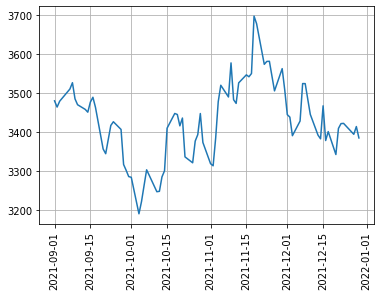

In [ ]:
import matplotlib.pyplot as plt

plt. plot(Amazon_hist["Close"])
plt.xticks(rotation = 90)
plt.grid()
plt.show()

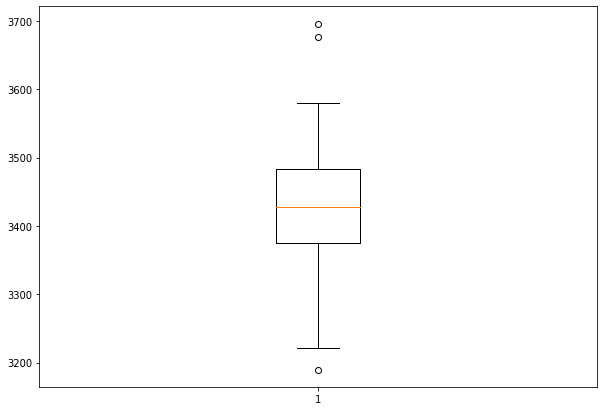

In [ ]:
# Creando los datos
data = Amazon_hist["Close"]
 
fig = plt.figure(figsize =(10, 7))
 
# Creando el plot
plt.boxplot(data)
 
# Mostrando el plot
plt.show()

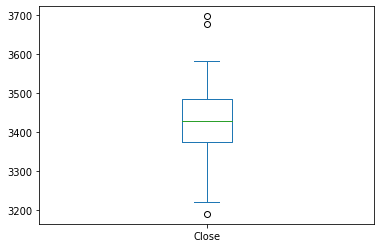

In [ ]:
Amazon_hist["Close"].plot(kind='box')

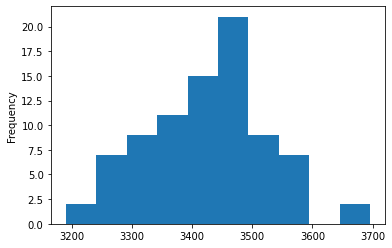

In [ ]:
Amazon_hist["Close"].plot(kind='hist')

## Estadísticas básicas

Dos cálculos útiles que se pueden hacer con los datos financieros son la varianza y la covarianza. Para ilustrar estos conceptos, utilicemos el ejemplo de un DataFrame que mide los precios de las acciones y los bonos a lo largo del tiempo

### Varianza

La varianza mide la distancia entre un conjunto de números y su media. En finanzas, se utiliza para determinar la volatilidad de las inversiones.


In [ ]:
stock_data["Close"].var()

349655.6219665942

### Covarianza
La covarianza, en un contexto financiero, describe la relación entre los rendimientos de dos inversiones diferentes a lo largo de un periodo de tiempo, y puede utilizarse para ayudar a equilibrar una cartera. Llamar a nuestras columnas de acciones y bonos cov() produce una matriz que define los valores de covarianza entre cada par de columnas en el DataFrame. La covarianza también se conoce como correlación en finanzas.

In [ ]:
stock_data[["Close", "Volume"]].cov()

,Close,Volume
Close,3.496556e+05,-1.578759e+08
Volume,-1.578759e+08,6.939855e+11


Cada valor anterior representa la covarianza entre dos columnas. Cuanto más alto sea el número, más tienden las inversiones a subir y bajar al mismo tiempo. Las columnas superior derecha e inferior izquierda representan la covarianza entre acciones y bonos. Aquí tenemos un número negativo, que indica que el precio de cierre y el volumen tienden a moverse en direcciones diferentes.

### Rentabilidad logarítmica

La rentabilidad logarítmica es uno de los tres métodos para calcular la rentabilidad y supone que los rendimientos se componen de forma continua y no a través de subperíodos. Se calcula tomando el logaritmo natural del valor final dividido por el valor inicial.

omo ejemplo, digamos que el valor final de una inversión fue de 11 dólares y el valor inicial de 10 dólares. La función diría =LN(11/10) para un resultado de 9,53%.

En matemáticas y estadística, se suele distinguir entre datos discretos y continuos. El retorno aritmético es la versión continua más teórica. En el mundo real, sin embargo, la mayoría de la gente piensa en rendimientos divididos en períodos discretos.

* Retorno aritmético - Un periodo, no compuesto, discreto.
* Retorno geométrico - Multiperiodo, compuesto, discreto.
* Retorno logarítmico - Infinitos periodos, compuestos, continuos.

Así que el retorno logarítmico es la versión no discreta, continua, lo que significa que si todo el período se dividiera en un número infinito de períodos, ¿cuál sería ese retorno? Como ves, es teórico.

Salvo para periodos de tiempo muy cortos (menos de un día), y para aplicaciones teóricas que impliquen el cálculo y la medición precisa de curvas, los rendimientos logarítmicos no se suelen utilizar.

Los datos de los precios son útiles, pero en este caso, ya que queremos comparar cada conjunto de datos, sería aún mejor si en lugar de los precios diarios/anuales, tuviéramos información sobre los rendimientos de los precios diarios/anuales.

Como primer paso, vamos a calcular el retorno logaritmico de los precios de cierre.

La ecuación para calcular la rentabilidad logarítmica entre dos precios es la siguiente log_natural(precio actual/precio anterior)

En nuestro caso queremos ejecutar esta ecuación para cada día/año de datos de precios en nuestra serie de DataFrame importada (la serie A es una sola columna en un DataFrame).

In [ ]:
import numpy as np

Google["Rent"] = Google["Close"]/Google["Close_1"]
Google

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,Close,Close_1,Rent
Date,,,,
2020-01-02,1348.410034,1368.680054,NaN,NaN
2020-01-03,1348.000000,1361.520020,1368.680054,0.994769
2020-01-06,1351.630005,1397.810059,1361.520020,1.026654
2020-01-07,1400.459961,1395.109985,1397.810059,0.998068
2020-01-08,1394.819946,1405.040039,1395.109985,1.007118
...,...,...,...,...
2022-02-25,2671.040039,2689.189941,2653.820068,1.013328
2022-02-28,2661.000000,2701.139893,2689.189941,1.004444
2022-03-01,2697.570068,2681.229980,2701.139893,0.992629


La ecuación para calcular la rentabilidad logarítmica entre dos precios es la siguiente log_natural(precio actual/precio anterior)

En nuestro caso queremos ejecutar esta ecuación para cada día/año de datos de precios en nuestra serie de DataFrame importada (la serie A es una sola columna en un DataFrame).

In [ ]:
Google["Rent_log"] = np.log(Google["Close"]/Google["Close_1"])
Google

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,Close,Close_1,Rent,Rent_log
Date,,,,,
2020-01-02,1348.410034,1368.680054,NaN,NaN,NaN
2020-01-03,1348.000000,1361.520020,1368.680054,0.994769,-0.005245
2020-01-06,1351.630005,1397.810059,1361.520020,1.026654,0.026305
2020-01-07,1400.459961,1395.109985,1397.810059,0.998068,-0.001934
2020-01-08,1394.819946,1405.040039,1395.109985,1.007118,0.007093
...,...,...,...,...,...
2022-02-25,2671.040039,2689.189941,2653.820068,1.013328,0.013240
2022-02-28,2661.000000,2701.139893,2689.189941,1.004444,0.004434
2022-03-01,2697.570068,2681.229980,2701.139893,0.992629,-0.007398


### Historicos

In [ ]:
import pandas as pd

Stock = pd.DataFrame()
Stock["Apple_C"] = Apple_hist["Close"]
Stock["Amazon_C"] = Amazon_hist["Close"]
Stock["Google_C"] = Google["Close"]
Stock

,Apple_C,Amazon_C,Google_C
Date,,,
1980-12-12,0.100326,NaN,NaN
1980-12-15,0.095092,NaN,NaN
1980-12-16,0.088112,NaN,NaN
1980-12-17,0.090293,NaN,NaN
1980-12-18,0.092911,NaN,NaN
...,...,...,...
2022-02-25,164.850006,NaN,2689.189941
2022-02-28,165.119995,NaN,2701.139893
2022-03-01,163.199997,NaN,2681.229980


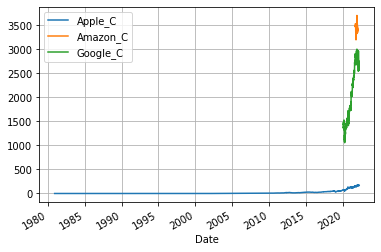

In [ ]:
Stock.plot(grid = True)

La diferencia entre los precios de las acciones de nuestro portafolio hace que sea dificil de visualizar correctamentre nuestros datos.

Una solución es mapear en dos escalas diferentes. Una escala se usa para los datos de Apple; la otra escala se usa para datos de Google y Amazon.

In [ ]:
Stock

,Apple_C,Amazon_C,Google_C
Date,,,
1980-12-12,0.100326,NaN,NaN
1980-12-15,0.095092,NaN,NaN
1980-12-16,0.088112,NaN,NaN
1980-12-17,0.090293,NaN,NaN
1980-12-18,0.092911,NaN,NaN
...,...,...,...
2022-02-25,164.850006,NaN,2689.189941
2022-02-28,165.119995,NaN,2701.139893
2022-03-01,163.199997,NaN,2681.229980


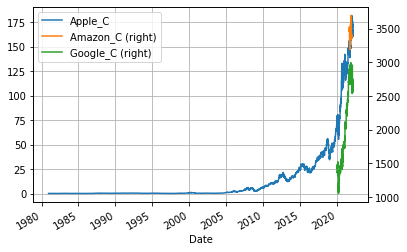

In [ ]:
Stock.plot(secondary_y = ["Amazon_C", "Google_C"], grid = True)

Una solución "mejor" es visualizar la información que realmente nos interesa: las devoluciones de existencias. Esto requiere que realicemos la transformación de datos necesaria. Hay muchas formas de transformar datos. Uno de los métodos de conversión es comparar el precio de las acciones de cada día de negociación con el precio de las acciones al comienzo del período de interés.

In [ ]:
Stock_Return = pd.DataFrame()
Stock_Return["Amazon_R"] = Stock["Amazon_C"] / Stock["Amazon_C"][0]
Stock_Return["Apple_R"] = Stock["Apple_C"] / Stock["Apple_C"][0]
Stock_Return["Google_R"] = Stock["Google_C"] / Stock["Google_C"][0]

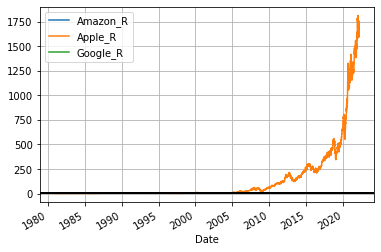

In [ ]:
Stock_Return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

Esta foto es mucho más útil. Ahora podemos ver qué tan alto es el rendimiento de cada acción desde la fecha que nos importa. Y podemos ver que la correlación entre estas poblaciones es alta. Básicamente se mueven en la misma dirección, lo cual es difícil de observar en otros tipos de gráficos.

También podemos trazar cambios diarios en el valor de las acciones. Un método factible es utilizar el cambio del valor de la acción de $ t + 1 $ al día siguiente y $ t $ el mismo día que el precio de la acción del día:

### Incremento
Comparación del precio de hoy y el día anterior

In [ ]:
Stock_Increase = pd.DataFrame()
Stock_Increase["Amazon_I"] = (Amazon_hist["Close"]-Amazon_hist["Close"].shift(1))/Amazon_hist["Close"]
Stock_Increase["Apple_I"] = (Apple_hist["Close"]-Apple_hist["Close"].shift(1))/Apple_hist["Close"]
Stock_Increase["Google_I"] = (Google["Close"]-Google["Close"].shift(1))/Google["Close"]

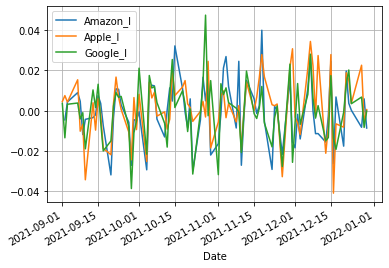

In [ ]:
Stock_Increase.plot(grid = True)

### Cambio log

La ventaja de usar una diferencia logarítmica es que el valor de la diferencia puede interpretarse como una diferencia porcentual en el stock, pero no se ve afectado por el denominador.

In [ ]:
Stock_Change = pd.DataFrame()
Stock_Change["Amazon_Ch"] = np.log(Amazon_hist["Close"])-np.log(Amazon_hist["Close"].shift(1))
Stock_Change["Apple_Ch"] = np.log(Apple_hist["Close"])-np.log(Apple_hist["Close"].shift(1))
Stock_Change["Google_Ch"] = np.log(Google["Close"])-np.log(Google["Close"].shift(1))

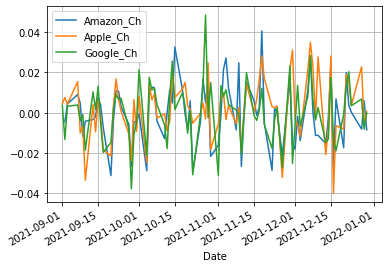

In [ ]:
Stock_Change.plot(grid = True)

### Media Movil

Un promedio móvil q-día (usando $MA^q_t$ Representar) se define como: para un cierto punto de tiempo $t$, el promedio de q días antes.

$MA^{q}_{t}$ = $\frac{1}{q}\sum_{i=0}^{q-1}x_{t-i}$

Los promedios móviles pueden suavizar una serie de datos y ayudarnos a encontrar tendencias. Cuanto mayor es el valor de q, menos sensible es el promedio móvil a las fluctuaciones a corto plazo. El propósito básico de la media móvil es identificar las tendencias del ruido.RápidoLos promedios móviles tienen qs más pequeños, que están más cerca de los precios de las acciones; yLentoLos promedios móviles tienen un valor q mayor, lo que los hace menos sensibles a las fluctuaciones y más estables.

Pandas proporcionan funciones para calcular promedios móviles. A continuación, demostraré el uso de esta función para calcular un promedio móvil de 20 días (un mes) del precio de las acciones de Apple y trazarlo con el precio de las acciones.

In [ ]:
Stock_Apple = pd.DataFrame(Apple_hist["Close"])
Stock_Apple["MV_20_1"] =  np.round(Apple_hist["Close"].rolling(window = 20, center = False).mean(), 2)
Stock_Apple["MV_20_1"].head(25)

Date
1980-12-12     NaN
1980-12-15     NaN
1980-12-16     NaN
1980-12-17     NaN
1980-12-18     NaN
1980-12-19     NaN
1980-12-22     NaN
1980-12-23     NaN
1980-12-24     NaN
1980-12-26     NaN
1980-12-29     NaN
1980-12-30     NaN
1980-12-31     NaN
1981-01-02     NaN
1981-01-05     NaN
1981-01-06     NaN
1981-01-07     NaN
1981-01-08     NaN
1981-01-09     NaN
1981-01-12    0.11
1981-01-13    0.11
1981-01-14    0.11
1981-01-15    0.11
1981-01-16    0.11
1981-01-19    0.11
Name: MV_20_1, dtype: float64

In [ ]:
Stock_Apple["MV_20_2"] = Apple_hist["Close"].rolling(20).mean()
Stock_Apple["MV_20_2"].head(25)

Date
1980-12-12         NaN
1980-12-15         NaN
1980-12-16         NaN
1980-12-17         NaN
1980-12-18         NaN
1980-12-19         NaN
1980-12-22         NaN
1980-12-23         NaN
1980-12-24         NaN
1980-12-26         NaN
1980-12-29         NaN
1980-12-30         NaN
1980-12-31         NaN
1981-01-02         NaN
1981-01-05         NaN
1981-01-06         NaN
1981-01-07         NaN
1981-01-08         NaN
1981-01-09         NaN
1981-01-12    0.108330
1981-01-13    0.108635
1981-01-14    0.109224
1981-01-15    0.110271
1981-01-16    0.111165
1981-01-19    0.112256
Name: MV_20_2, dtype: float64

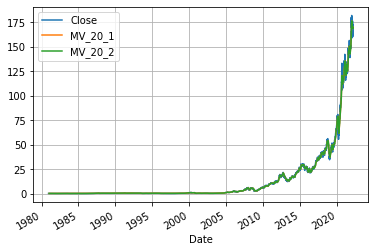

In [ ]:
Stock_Apple
Stock_Apple.plot(grid = True)

### MACD

El indicador MACD significa Divergencia de convergencia de la media móvil. Como sugiere el nombre, el indicador evalúa dos promedios móviles y la relación entre ellos.

$MACD=FastEMA-SlowEMA$

$SignalLine=9periodEMAfromMACD$

FastEMA = EMA de 12 períodos desde el precio de cierre
SlowEMA = EMA de 26 períodos desde el precio de cierre

ACD utiliza medias móviles exponencialmente ponderadas (EMA). La configuración típica del indicador es MACD (12,26,9) como se muestra arriba.

Sesgo alcista: cuando ambas líneas están por encima de cero.
Sesgo bajista: cuando ambas líneas están por debajo de cero.

El cruce podría significar la reversión de una tendencia.

La señal de compra se genera cuando la línea MACD cruza SignalLine desde abajo. La señal de compra se considera más fuerte cuando el cruce se produce por debajo de la línea cero. Compra con sesgo bajista esperando un cambio de tendencia.

La señal de venta se genera cuando la línea MACD cruza SignalLine desde arriba. La señal de venta se considera más fuerte cuando el cruce se produce por encima de la línea cero. Vender con sesgo alcista esperando un cambio de tendencia.

Además, cuanto más lejos se produzca el cruce desde la línea cero, más fuerte será la señal.

Además de esto, también tenemos el histograma (diferencia entre la línea MACD y SignalLine) que sirve como una alerta temprana para los cruces. Cuando las barras se acortan, indica que la señal de cruce podría llegar pronto.

También podemos usar MACD para detectar divergencias entre la acción del precio y el indicador, aunque las divergencias son más difíciles de detectar programáticamente.

In [ ]:
import pandas_datareader as pdr
import datetime as dt
ticker = Google["Close"]
print(ticker)

Date
2020-01-02    1368.680054
2020-01-03    1361.520020
2020-01-06    1397.810059
2020-01-07    1395.109985
2020-01-08    1405.040039
                 ...     
2022-02-25    2689.189941
2022-02-28    2701.139893
2022-03-01    2681.229980
2022-03-02    2691.429932
2022-03-03    2691.295410
Name: Close, Length: 547, dtype: float64


In [ ]:
exp1 = ticker.ewm(span=12, adjust=False).mean()
exp2 = ticker.ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
exp3 = macd.ewm(span=9, adjust=False).mean()

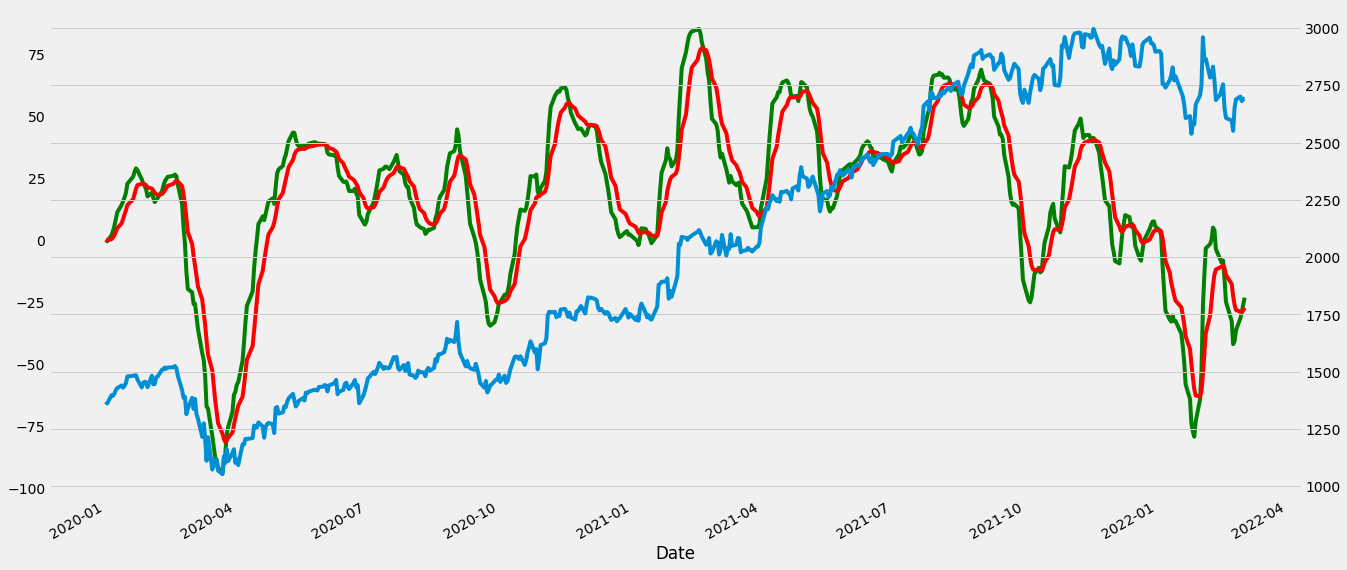

In [ ]:
macd.plot(label='Google MACD', color='g')
ax = exp3.plot(label='Signal Line', color='r')
ticker.plot(ax=ax, secondary_y=True, label='Google')

Como podemos observar no nos dice mucho la g´rafica pues esta sobrepuesta, mejoremos esto separandola en 2 partes, cada una correspondiente a sus valores.

In [ ]:
def computeMACD (df, n_fast, n_slow, n_smooth):
    data = df['Close']
    
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    MACDsig = pd.Series(MACD.ewm(span=n_smooth, min_periods=n_smooth).mean(), name='MACDsig')
    MACDhist = pd.Series(MACD - MACDsig, name = 'MACDhist')
    df = df.join(MACD)
    df = df.join(MACDsig)
    df = df.join(MACDhist)
    
    return df

In [ ]:
df = computeMACD(Google, 12, 26, 9)
df

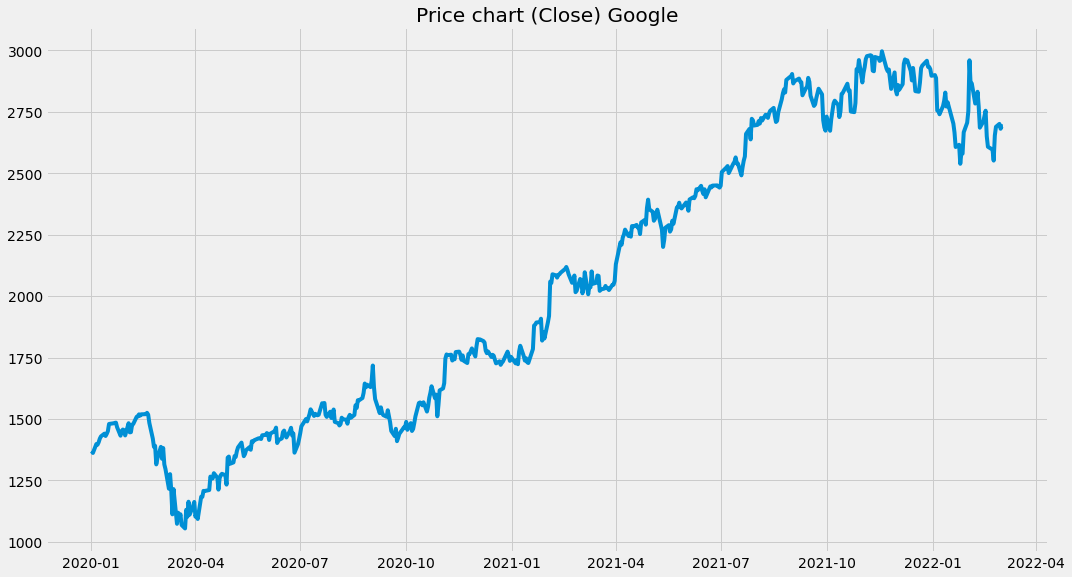

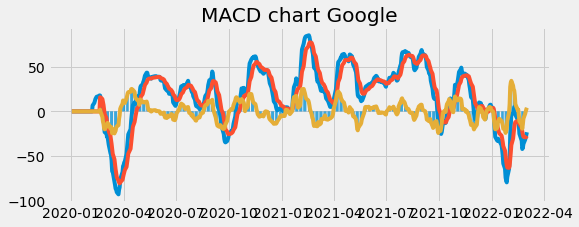

In [ ]:
fechas = list(df.index)
datos = df

# plot price
plt.figure(figsize=(16,9))
plt.plot(fechas, datos["Close"])
plt.title('Price chart (Close) ' + "Google")
plt.show()

# plot correspondiendo a los valores del RSI y niveles significantes
plt.figure(figsize=(8,3))
plt.title('MACD chart ' + "Google")
plt.plot(fechas, df['MACD'].fillna(0))
plt.plot(fechas, df['MACDsig'].fillna(0))
plt.plot(fechas, df['MACDhist'].fillna(0))
plt.bar(fechas, df['MACDhist'].fillna(0), width=1, snap=False)

plt.show()